In [ ]:
import numpy as np
import pandas as pd
from utils.utils import PROJECT_DATA_DIR
import os
#import mxnet as mx
import tarfile
import warnings
from deep_learning_keras import plot_loss, train_model
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\gilbe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
sensor_train = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                        'all_training_400_minisensor_1.csv'), 
                           sep='\s+', header=None)

sensor_test = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                       'all_test_400_minisensor.csv'),
                          sep='\s+', header=None)

In [ ]:
sensor_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-3,3,4,-3,3,4,1,-3,2,0,...,0,0,0,3,0,-4,-2,0,-5,8
1,3,0,0,1,0,0,0,2,0,0,...,-1,0,-7,3,-1,-7,7,-1,-5,7
2,1,-3,7,0,1,4,-3,4,0,-2,...,-4,1,8,-2,1,12,0,4,11,4
3,4,1,-1,3,4,-8,3,4,-1,3,...,0,4,-5,-1,3,6,3,4,7,6
4,0,-4,0,5,0,0,5,0,-5,0,...,0,-4,-4,3,3,0,4,3,1,8


In [ ]:
sensor_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,1,-1,-1,0,2,-1,-2,2,1,-2,...,-2,-3,0,0,0,1,0,2,0,8
1,3,6,-13,3,6,-8,3,6,-2,-1,...,-1,7,44,14,7,51,23,11,59,6
2,-1,2,-1,2,0,-1,-4,-3,0,-4,...,-1,0,-1,-1,0,-8,-3,0,-3,5
3,48,18,-57,48,-3,-148,37,-33,-241,29,...,4,0,-17,9,0,-17,6,0,-21,8
4,-2,-2,0,0,-3,1,-3,0,0,3,...,0,0,4,0,-3,6,3,-3,4,8


In [ ]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 8,  7,  4,  6, -1,  1,  5,  2,  9,  3,  0], dtype=int64)

In [ ]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 8,  7,  4,  6, -1,  1,  5,  2,  9,  3,  0], dtype=int64)

In [ ]:
sensor_test[sensor_test.columns[-1]].unique()

array([ 8,  6,  5,  4,  0, -1,  2,  1,  9,  7,  3], dtype=int64)

In [ ]:
ytrain = sensor_train[sensor_train.columns[-1]]
#ytrain.head()
xtrain = sensor_train.drop(sensor_train.columns[-1], axis=1) 

In [ ]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-3,3,4,-3,3,4,1,-3,2,0,...,-1,0,0,0,3,0,-4,-2,0,-5
1,3,0,0,1,0,0,0,2,0,0,...,-8,-1,0,-7,3,-1,-7,7,-1,-5
2,1,-3,7,0,1,4,-3,4,0,-2,...,4,-4,1,8,-2,1,12,0,4,11
3,4,1,-1,3,4,-8,3,4,-1,3,...,-1,0,4,-5,-1,3,6,3,4,7
4,0,-4,0,5,0,0,5,0,-5,0,...,4,0,-4,-4,3,3,0,4,3,1


In [ ]:
ytest = sensor_test[sensor_test.columns[-1]]
xtest = sensor_test.drop(sensor_test.columns[-1], axis=1) 

In [ ]:
#ytrain_sc = ytrain.map(lambda x: 1 if (x == 1) else 0)
#ytest_sc = ytest.map(lambda x: 1 if (x == 1) else 0)
ytrain_sc = ytrain
ytest_sc = ytest

In [ ]:
print(ytrain_sc.unique())
ytrain_sc.head()


[ 8  7  4  6 -1  1  5  2  9  3  0]


0    8
1    7
2    4
3    6
4    8
Name: 1200, dtype: int64

## Preprocessing

In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91104 entries, 0 to 91103
Columns: 1200 entries, 0 to 1199
dtypes: int64(1200)
memory usage: 834.1 MB


In [ ]:
print(xtrain.shape)
xtrain.describe()

(91104, 1200)


,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
count,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,...,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000
mean,-0.148303,-0.084958,1.254369,-0.187906,-0.006333,1.236104,-0.169652,-0.041293,1.176655,-0.134264,...,1.176524,-0.145855,-0.018858,1.112937,-0.092213,-0.039427,1.077790,-0.040437,-0.056682,1.104759
std,27.286271,27.909568,46.855641,27.765273,28.559648,46.999119,28.626503,28.982204,46.765926,28.193874,...,46.367091,27.301695,27.251507,46.007632,27.150623,27.219451,46.120196,26.833842,26.793117,45.991891
min,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-1160.000000,-2305.000000,...,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-1914.000000,-1998.000000,-1160.000000,-2305.000000,-1998.000000,-950.000000
25%,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,...,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000,-2.000000,-2.000000,-4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,...,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000
max,542.000000,2001.000000,1169.000000,438.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,...,1169.000000,542.000000,2001.000000,1169.000000,542.000000,2054.000000,1169.000000,542.000000,2054.000000,1169.000000


In [ ]:
import matplotlib.pyplot as plt

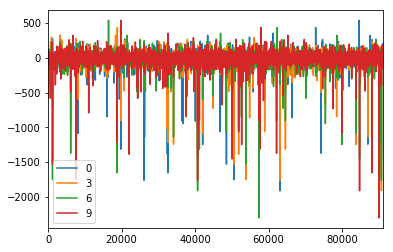

In [ ]:
xtrain[xtrain.columns[0:10:3]].plot()
plt.show()

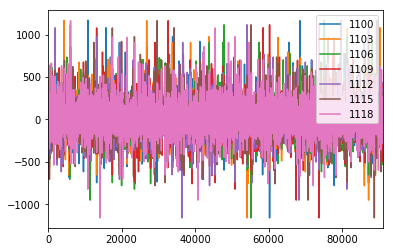

In [ ]:
xtrain[xtrain.columns[1100:1120:3]].plot()
plt.show()

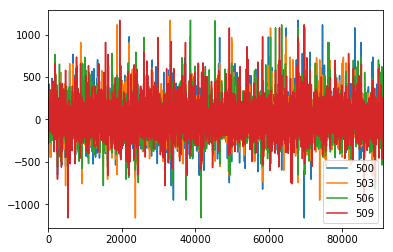

In [ ]:
xtrain[xtrain.columns[500:510:3]].plot()
plt.show()

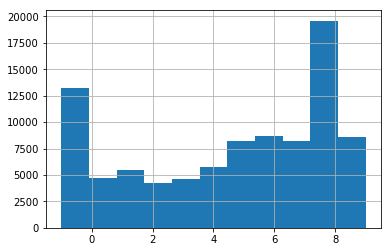

In [ ]:
ytrain_sc.hist(bins=11)
plt.show()

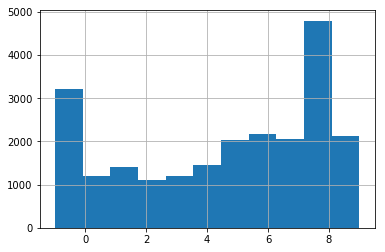

In [ ]:
ytest_sc.hist(bins=11)
plt.show()

## Rearrange to (x, y, z)

In [ ]:
xtest_reshape = xtest.values.reshape(-1, 3)
print(xtest_reshape)
print(xtest_reshape.shape)
print(xtest.shape)

[[ 1 -1 -1]
 [ 0  2 -1]
 [-2  2  1]
 ...
 [-4  0 64]
 [-4 -3 35]
 [-3  0 11]]
(9110400, 3)
(22776, 1200)


In [ ]:
xtrain_reshape = xtrain.values.reshape(-1, 3)

## Scaling and transforming data

In [ ]:
print(ytrain_sc.values+1)

[ 9  8  5 ...  2  9 10]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras import optimizers
from sklearn.metrics import f1_score

In [ ]:
y_cat_train = keras.utils.to_categorical(ytrain_sc.values + 1, num_classes=11)
y_cat_test = keras.utils.to_categorical(ytest_sc.values + 1, num_classes=11)
print(y_cat_test)
for i in range(20):
    print('{} {}'.format(i, y_cat_test[i]))
for i in range(20):
    print('{} {}'.format(i, ytest_sc.values[i]))


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
3 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
7 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
9 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
12 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
13 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
14 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
15 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
16 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
17 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
18 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
19 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 8
1 6
2 5
3 8
4 8
5 4
6 4
7 0
8 6
9 -1
10 2
11 2
12 -1
13 1
14 8
15 9
16 7
17 7
18 6
19 5


### Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [ ]:
scaler = QuantileTransformer(output_distribution='normal')
xtrain_sc = scaler.fit_transform(xtrain_reshape)
xtest_sc = scaler.transform(xtest_reshape)

In [ ]:
xtrain_sc_reshape = xtrain_sc.reshape(-1, 400, 3)
xtest_sc_reshape = xtest_sc.reshape(-1, 400, 3)

In [ ]:
print(ytrain_sc.shape)
print(xtrain_sc_reshape.shape)
type(xtrain_sc_reshape)
print(xtest_sc_reshape.shape)
print(ytest.shape)


(91104,)
(91104, 400, 3)
(22776, 400, 3)
(22776,)


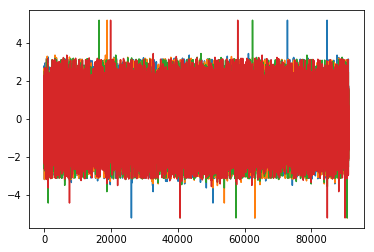

In [ ]:
plt.plot(xtrain_sc_reshape[:,0:4:1,0])
plt.show()


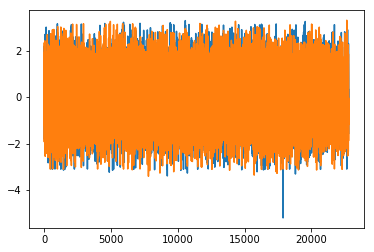

In [ ]:
plt.plot(xtest_sc_reshape[:,0:4:3, 0])
plt.show()

## Model

In [ ]:
#del model
model = Sequential()
model.add(BatchNormalization(input_shape=(400, 3)))
model.add(LSTM(units=20, input_shape=(400, 3),
               return_sequences=True))
model.add(Dropout(0.4))
model.add(BatchNormalization(input_shape=(400, 3)))
model.add(LSTM(20))
model.add(Dropout(0.4))
model.add(BatchNormalization(input_shape=(400, 3)))
model.add(Dense(units=11, activation='softmax'))


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
lr = 0.01
optim = optimizers.Adam(lr=lr,
                        beta_1=0.9,
                        beta_2=0.999,
                        decay=1e-6)
model.compile(loss='categorical_crossentropy',
                        optimizer=optim,
                        metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
#reduce_lr = RedureLROnPlateau(monitor='val_loss', 
#                              factor=0.2,
#                              patience=5, 
#                              min_lr=0.00001,
#                              verbose=2)

history = model.fit(xtrain_sc_reshape,
                    y_cat_train,                        
                    epochs=20,
                    batch_size=2**8, 
                    validation_data=(xtest_sc_reshape, 
                                     y_cat_test), 
                    shuffle=False, 
                    #callbacks=[reduce_lr]
                   )

Train on 91104 samples, validate on 22776 samples
Epoch 1/20
91104/91104 [==============================] - 373s - loss: 0.8133 - acc: 0.7161 - val_loss: 0.5082 - val_acc: 0.8051
Epoch 2/20
91104/91104 [==============================] - 383s - loss: 0.7473 - acc: 0.7394 - val_loss: 0.7936 - val_acc: 0.7269
Epoch 3/20
91104/91104 [==============================] - 382s - loss: 0.6382 - acc: 0.7689 - val_loss: 0.4116 - val_acc: 0.8350
Epoch 4/20
91104/91104 [==============================] - 384s - loss: 0.4745 - acc: 0.8158 - val_loss: 0.3566 - val_acc: 0.8694
Epoch 5/20
91104/91104 [==============================] - 393s - loss: 0.3636 - acc: 0.8573 - val_loss: 0.2245 - val_acc: 0.9134
Epoch 6/20
91104/91104 [==============================] - 389s - loss: 0.4118 - acc: 0.8499 - val_loss: 0.3222 - val_acc: 0.8894
Epoch 7/20
91104/91104 [==============================] - 390s - loss: 0.3998 - acc: 0.8536 - val_loss: 0.4812 - val_acc: 0.8343
Epoch 8/20
91104/91104 [=======================

In [ ]:
pred_train = model.predict_classes(xtrain_sc_reshape)
pred_test = model.predict_classes(xtest_sc_reshape)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')


In [ ]:
print('training score:', f1_score(ytrain_sc.values + 1, pred_train, average=None))
print('test score:', f1_score(ytest_sc.values + 1, pred_test, average=None))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(ytest_sc+1, pred_test))

In [ ]:
print(confusion_matrix(ytest_sc+1, pred_test))

In [ ]:
plot_loss(history)